# Développez une application pour prédire les émissions CO2 des bâtiments

Contexte du projet

La collectivité d'une ville fait appel à votre agence spécialisée dans l’analyse des émissions CO2 des bâtiments. Le président de la collectivité souhaite mettre en place une stratégie à 4 ans pour réduire les émissions de gaz à effet de serre.

Pour cela, vous disposez d’un de jeu de données sur l’information de 3376 bâtiments et 46 colonnes. Ces données représentent des mesures de relevés annuelles collectées en 2016 par des agents de la ville.

Dans un premier temps, le président souhaite avoir une analyse de ce jeu de données et faire un état de lieu de la ville de Seattle en termes d’émissions CO2 et consommation d’énergie. Dans cette analyse, vous devez expliquer ce qui impact le plus sur les émissions CO2.

Puis, étant donné que les relevés sont coûteux à obtenir, la collectivité aimerait avoir un outil de prédiction, notamment pour l’utiliser sur les bâtiments où l’on n’a pas encore des mesures ou bien dans les années à venir. Ainsi, ils vont pouvoir prédire la consommation des bâtiments et leur taux d'émission CO2.

In [20]:
#Import des librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Import du Dataset
df_raw = pd.read_csv("C:/Users/User/Desktop/emissions_CO2/2016_Building_Energy_Benchmarking.csv")
df_raw.head()

<IPython.core.display.Javascript object>

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [13]:
df = df_raw.copy()

# Exploratory Data Analysis(EDA)

In [15]:
df.shape

(3376, 46)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [21]:
df["DataYear"].unique()

array([2016], dtype=int64)

In [23]:
df["City"].unique()

array(['Seattle'], dtype=object)

In [25]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [ ]:
#Notre dataset contient 3376 raw et 46 features. 
#Notre target est TotalGHGEmissions qui correspond à la quantité de C02 émise par batiment
#Chaque Batiment possède un identifiant unique dans la colonne OSEBuildingID
#Notre étude va se faire sur des données récoltées en 2016 dans la ville de Seatle 

In [ ]:
Explication des variables:
On peut diviser nos features en 3 grandes catégories:
    
- Les variables concernant la surface
- Les variables concernant la localisation 
- Les variables conernant la consomation d energie 

In [ ]:
# Missing value

<AxesSubplot:>

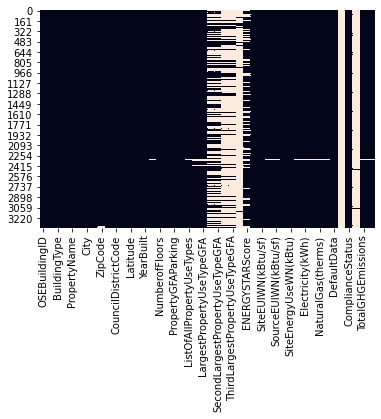

In [29]:
sns.heatmap(df.isnull(), cbar=False)

In [249]:
df = df_raw.copy()

In [250]:
#Drop des missing value 
df = df.fillna(df.mean())
df.shape

<ipython-input-250-38c3120f543f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


(3376, 46)

In [251]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                               0
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA       0


In [ ]:
df.isnull().sum()

In [175]:
# checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_values_train = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values_train.head(30)

,Total,Percent
Comments,3376,100.000000
Outlier,3344,99.052133
YearsENERGYSTARCertified,3257,96.475118
ThirdLargestPropertyUseType,2780,82.345972
ThirdLargestPropertyUseTypeGFA,2780,82.345972
SecondLargestPropertyUseType,1697,50.266588
SecondLargestPropertyUseTypeGFA,1697,50.266588
ENERGYSTARScore,843,24.970379
LargestPropertyUseTypeGFA,20,0.592417
LargestPropertyUseType,20,0.592417


In [217]:
# keep only columns where 60% or more valid data is available
df=df.dropna(how='any',axis=1,thresh=df.shape[0]*0.4)

In [218]:
df.shape

(3376, 41)

In [219]:
df.columns.values

array(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'], dtype=object)

In [220]:
#Duplicate on ID batiment 
df = df.drop_duplicates(subset=['OSEBuildingID'])

In [221]:
df = df.drop(['ENERGYSTARScore', "City", "Address", "State","ZipCode", "DataYear", "OSEBuildingID", "PropertyName", "TaxParcelIdentificationNumber"], axis = 1)

In [222]:
df.select_dtypes(include=["object"]).columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ComplianceStatus'],
      dtype='object')

In [223]:
df['BuildingType'].fillna('Rien', inplace=True)
df['PrimaryPropertyType'].fillna('Rien', inplace=True)
df['Neighborhood'].fillna('Rien', inplace=True)
df['ListOfAllPropertyUseTypes'].fillna('Rien', inplace=True)
df['LargestPropertyUseType'].fillna('Rien', inplace=True)
df['ComplianceStatus'].fillna('Rien', inplace=True)
df['SecondLargestPropertyUseType'].fillna('Rien', inplace=True)

In [ ]:
# df[['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
#        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
#        'SecondLargestPropertyUseType', 'ComplianceStatus']] = df[['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
#        'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
#        'SecondLargestPropertyUseType', 'ComplianceStatus']].cat.add_categories('RIEN').fillna('RIEN')

In [224]:
#Drop des missing value 
df = df.fillna(df.mean())
df.shape

<ipython-input-224-38c3120f543f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


(3376, 32)

In [225]:
df.isnull().sum()

BuildingType                       0
PrimaryPropertyType                0
CouncilDistrictCode                0
Neighborhood                       0
Latitude                           0
Longitude                          0
YearBuilt                          0
NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
ListOfAllPropertyUseTypes          0
LargestPropertyUseType             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
SiteEUI(kBtu/sf)                   0
SiteEUIWN(kBtu/sf)                 0
SourceEUI(kBtu/sf)                 0
SourceEUIWN(kBtu/sf)               0
SiteEnergyUse(kBtu)                0
SiteEnergyUseWN(kBtu)              0
SteamUse(kBtu)                     0
Electricity(kWh)                   0
Electricity(kBtu)                  0
NaturalGas(therms)                 0
N

In [227]:
#df_bi = df.copy()

In [202]:
df.shape

(3376, 24)

<AxesSubplot:>

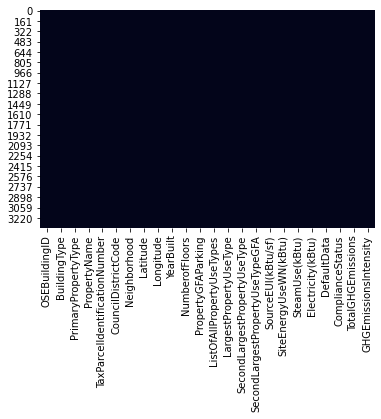

In [203]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# 

In [204]:
df.min()

OSEBuildingID                                        1
BuildingType                                    Campus
PrimaryPropertyType                Distribution Center
PropertyName                          #4706 Bitterlake
TaxParcelIdentificationNumber               0000000000
CouncilDistrictCode                                  1
Neighborhood                                   BALLARD
Latitude                                      47.49917
Longitude                                   -122.41425
YearBuilt                                         1900
NumberofFloors                                       0
PropertyGFAParking                                   0
ListOfAllPropertyUseTypes              Adult Education
LargestPropertyUseType                 Adult Education
SecondLargestPropertyUseType           Adult Education
SecondLargestPropertyUseTypeGFA                    0.0
SourceEUI(kBtu/sf)                                 0.0
SiteEnergyUseWN(kBtu)                              0.0
SteamUse(k

In [228]:
df["Electricity(kBtu)"].describe()

count    3.376000e+03
mean     3.707612e+06
std      1.483084e+07
min     -1.154170e+05
25%      6.409742e+05
50%      1.181688e+06
75%      2.848689e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

In [229]:
df[df["Electricity(kBtu)"]<0]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3206,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,47.61432,-122.31257,2013,1.0,6,52000,...,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,Compliant,-0.8,-0.02


In [230]:
df[df["TotalGHGEmissions"]<0]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3206,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,47.61432,-122.31257,2013,1.0,6,52000,...,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,Compliant,-0.8,-0.02


In [231]:
df[df["GHGEmissionsIntensity"]<0]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3206,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,47.61432,-122.31257,2013,1.0,6,52000,...,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0,False,Compliant,-0.8,-0.02


In [232]:
index_to_drop=df[df['Electricity(kBtu)']<0].index
df.drop(index_to_drop, inplace=True)

In [233]:
index_to_drop=df[df['TotalGHGEmissions']<0].index
df.drop(index_to_drop, inplace=True)

In [234]:
index_to_drop=df[df['GHGEmissionsIntensity']<0].index
df.drop(index_to_drop, inplace=True)

In [235]:
df.columns.values

array(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'], dtype=object)

In [ ]:
#Etude correlation faite par Marianne, suppression des features correlés et collinéaire 
# df_model = df.drop(['Electricity(kWh)','NaturalGas(therms)','SourceEUIWN(kBtu/sf)','SiteEUIWN(kBtu/sf)','PropertyGFABuilding(s)','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)','LargestPropertyUseTypeGFA','PropertyGFATotal','NumberofBuildings','NaturalGas(kBtu)'], axis=1)
# df_bi = df.copy()

In [236]:
df_model = df.drop(['Electricity(kWh)','NaturalGas(therms)','SourceEUIWN(kBtu/sf)','SiteEUIWN(kBtu/sf)','PropertyGFABuilding(s)','SiteEnergyUse(kBtu)','SiteEUI(kBtu/sf)','LargestPropertyUseTypeGFA','PropertyGFATotal','NumberofBuildings','NaturalGas(kBtu)'], axis=1)

In [237]:
df_bi = df.copy()

In [238]:
df_model.columns.values

array(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofFloors', 'PropertyGFAParking',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'], dtype=object)

In [240]:
df_bi.columns.values

array(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'], dtype=object)

In [242]:
df_bi.to_csv('out.csv')

In [243]:
df_model.to_csv('model.csv')

In [ ]:
'SourceEUI(kBtu/sf)': consommation d énergie a la source divisé par la surface 

'SiteEnergyUseWN(kBtu)': ajusté plus consommé cette année ou pas 

'SteamUse(kBtu)': quantité de vapeur de quartier consommé 
    
'Electricity(kBtu)':  conso d elec 
    
'ComplianceStatus',: analyse satisfaisant ou pas 

'TotalGHGEmissions': quanité de gaz total CO2 gaz a eeeft de sert 

'GHGEmissionsIntensity': divisé par le planché brut 

In [5]:
data = df_raw.copy()

### Analyse univariée

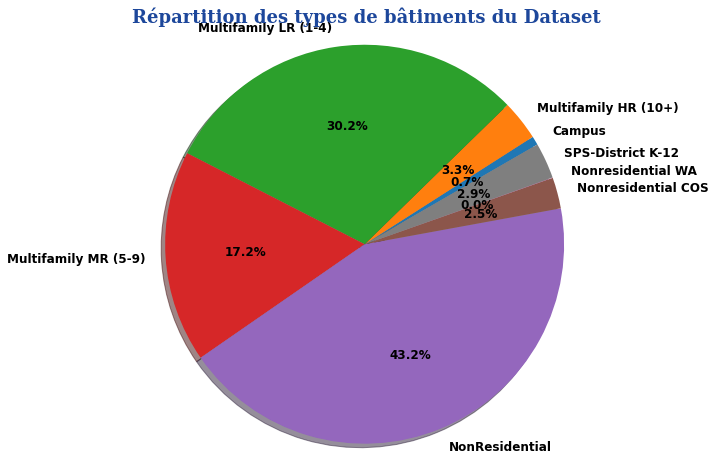

In [265]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset", fontdict=font_title)
plt.show()

In [ ]:
#la majeur partie des bâtiments sont typés "NonResidential" et "Multifamily"
#On peut aller plus loin et visualiser les différentes catégories 

In [7]:
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts() 

Small- and Mid-Sized Office    288
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

In [253]:
data.loc[(data['BuildingType']=="Multifamily LR (1-4)"),'PrimaryPropertyType'].value_counts() 

Low-Rise Multifamily           984
Senior Care Community           16
Mixed Use Property              11
Other                            4
Small- and Mid-Sized Office      1
Mid-Rise Multifamily             1
University                       1
Name: PrimaryPropertyType, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

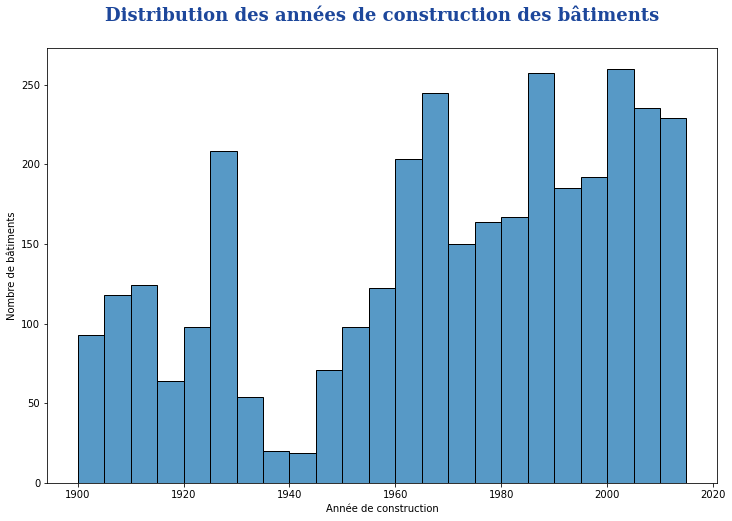

In [8]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

In [ ]:
#Dans notre dataset, on remarque que nous avons plus de données de batiments construits à partir de 1960
#On peut transformer l'année de contruction en age des bâtiments 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

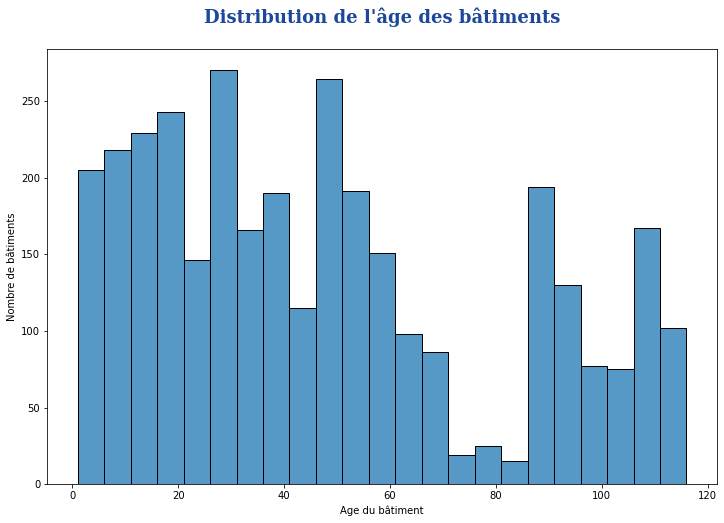

In [9]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

In [254]:
import plotly.express as px

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

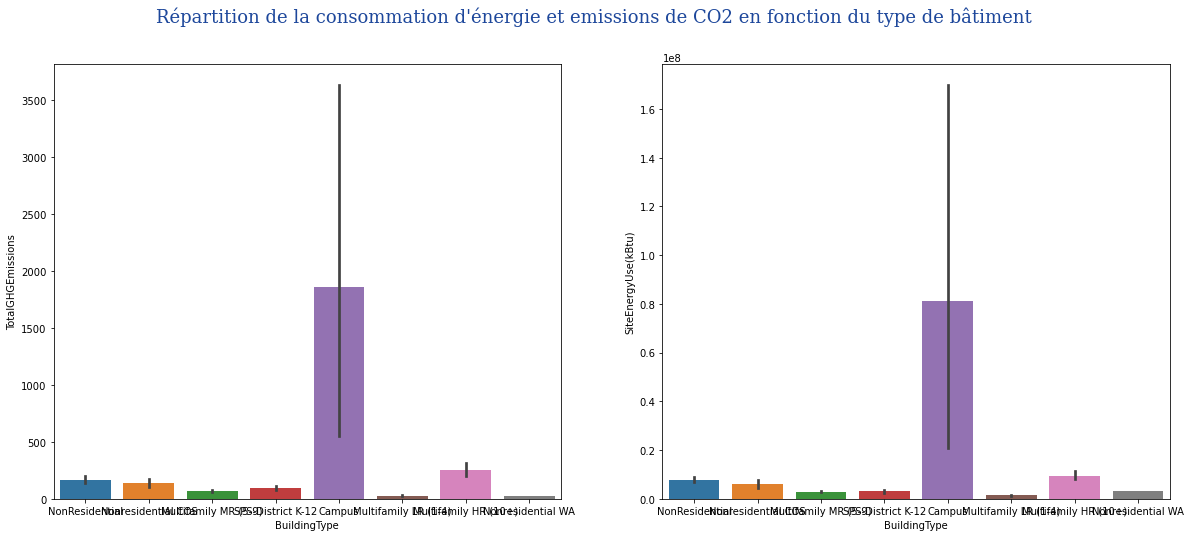

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

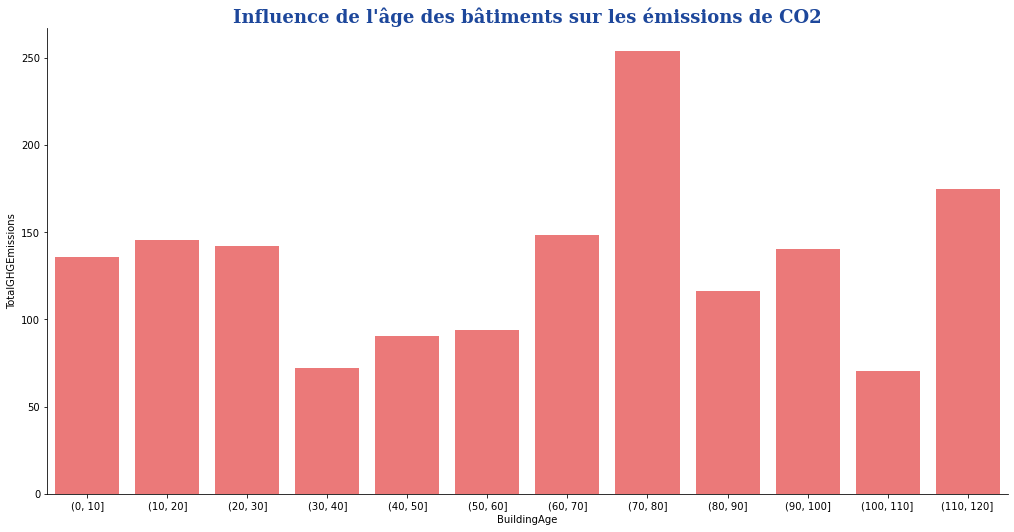

In [261]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['BuildingAge'], bins=bins), y="TotalGHGEmissions",
    ci=None, color="red", alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2", fontdict=font_title)
plt.show()

In [ ]:
#On remarque que plus les bâtiments sont anciens plus ils consomment de l'énergie et plus ils emettent sur CO2
#Cela semble logique, car les anciens bâtiments sont moins isolés et moins autonomes, 
#Un pic de batiments qui sont recent mais qui ne sont pas optimisés donc consomment bcp et emettent bcp de C02
#les plus récents sont ed plus en plus neutres

In [ ]:
#Localisation sur la carte 

In [17]:
seattle_lat = 47.6062
seattle_lon = -122.3321

In [18]:
import folium
import folium.plugins

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map